Did the Stochastics and MACD help you in deciding on the direction of pairs trade? If not, which indicator would have been ideal?

- No they did not. MACD is a double filtered signal so there is lag, built on top of lag with any MACD type signal. So in application to almost every trading system its very poor. Stochastics not useful as well. 

Write a Python program to download data for Dow Jones Transportation Average and Dow Jones Industrial Average for the last 5 Years.

Create and calculate any one indicator that would allow you to decide on making a pairs trade between these 2 indices.
Based on the historical values of that indicator, calculate and graphically represent the return profile of a pairs trading strategy

**Create Spread**

In [4]:
import pandas as pd
from pandas_datareader import data, wb
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

start = datetime.datetime(2014, 6, 1)
end = datetime.datetime(2017, 6, 1)

data = data.DataReader(['DIA','IYT'],  'google', start, end)
data =data['Open']
data.head()

,DIA,IYT
Date,,
2014-06-02,167.25,146.23
2014-06-03,166.94,146.34
2014-06-04,166.89,144.68
2014-06-05,167.51,145.57
2014-06-06,168.58,146.46


In [5]:
data['pr'] = data['DIA'] - data ['IYT']
data.tail()

,DIA,IYT,pr
Date,,,
2017-05-25,210.52,163.23,47.29
2017-05-26,210.54,165.10,45.44
2017-05-30,210.21,165.17,45.04
2017-05-31,210.41,165.75,44.66
2017-06-01,210.27,166.01,44.26


In [6]:
data = data['pr']
data = pd.DataFrame(data)
data.tail()

,pr
Date,
2017-05-25,47.29
2017-05-26,45.44
2017-05-30,45.04
2017-05-31,44.66
2017-06-01,44.26


In [7]:
data['returns'] = np.log(data / data.shift(1))

In [8]:
data['SMA'] = data['pr'].rolling(window=50,center=False).mean()

In [16]:
threshold = 7.5
data['distance'] = data['pr'] - data['SMA']

In [17]:
data = data.dropna()
data = pd.DataFrame(data)
data.head()

,pr,returns,SMA,distance
Date,,,,
2014-08-11,19.93,-0.024289,21.2890,-1.3590
2014-08-12,19.24,-0.035235,21.2534,-2.0134
2014-08-13,19.30,0.003114,21.2274,-1.9274
2014-08-14,19.41,0.005683,21.1714,-1.7614
2014-08-15,18.42,-0.052351,21.1010,-2.6810


In [18]:
import seaborn as sns

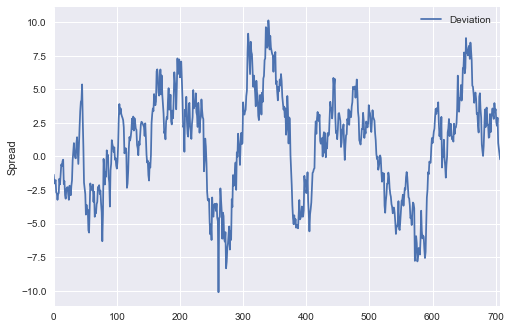

In [19]:
sns.tsplot(data=data['distance'],
           condition="Deviation", value="Spread")

**Create and calculate any one indicator that would allow you to decide on making a pairs trade
between these 2 indices.**

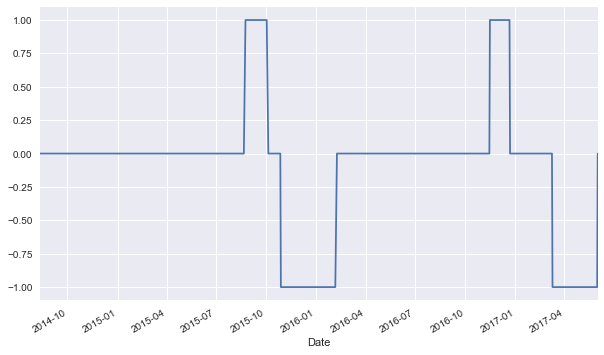

In [27]:
data['position'] = np.where(data['distance'] > threshold, -1, np.nan)
data['position'] = np.where(data['distance'] < -threshold, 1, data['position'])
data['position'] = np.where(data['distance'] * data['distance'].shift(1) < 0, 0, data['position'])
data['position'] = data['position'].ffill().fillna(0)
data['position'].plot(figsize=(10, 6))

** Based on the historical values of that indicator, calculate and graphically represent the return
profile of a pairs trading strategy **

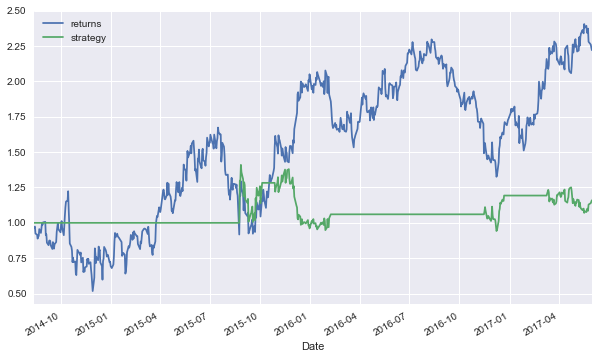

In [29]:
data['strategy'] = data['position'].shift(1) * data['returns']
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6))

** Cumulative returns of the Spread and the mean-reversion strategy (SMA = 50, threshold = 10)**